In [66]:
import os
import warnings
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sankeyflow import Sankey
from fuzzywuzzy import process

tqdm.pandas()
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [67]:
students_path = "./major_minor/students.csv"

In [68]:
df = pd.read_csv(students_path).drop(["email", "id"], axis=1)
df

,batch,email,id,name,status,major,minor,program,grad,cgpa,mgpa
0,ASP 2017-18,aania_asp18@ashoka.edu.in,UG-14-1609,Aania,Graduated,NaN,NaN,ASP,2018.0,2.64,0.0
1,ASP 2017-18,aashna.lal_asp18@ashoka.edu.in,UG-14-0568,Aashna Lal,Graduated,NaN,CW,ASP,2018.0,3.36,0.0
2,ASP 2017-18,abhinav.srikant_asp18@ashoka.edu.in,UG-14-1833,Abhinav Srikant,Graduated,PSY,MS,ASP,2018.0,3.14,0.0
3,ASP 2017-18,aditya.prakash_asp18@ashoka.edu.in,UG-14-1812,Aditya Prakash,Graduated,NaN,MAT,ASP,2018.0,3.57,0.0
4,ASP 2017-18,ahan.bezbaroa_asp18@ashoka.edu.in,UG-14-0336,Ahan Bezbaroa,Graduated,PPE,ENG,ASP,2018.0,3.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7001,UG 2023-27,yuvakshi.dam_ug2023@ashoka.edu.in,1020231747,Yuvakshi Dam,Enrolled,NaN,NaN,UG,2027.0,3.22,0.0
7002,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027.0,3.19,0.0
7003,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027.0,0.00,0.0
7004,UG 2023-27,zahrah.imani_ug2023@ashoka.edu.in,1020231749,Zahrah Salim Imani,Enrolled,NaN,NaN,UG,2027.0,3.82,0.0


In [69]:
ugs = df[df["program"] == "UG"]
asps = df[df["program"] == "ASP"]

asps["ug_grad"] = asps["grad"] - 1
asps["major"] = asps["major"] + " "
asps["minor"] = asps["minor"].apply(lambda x: x.replace(",", " ,") if (not pd.isna(x) and type(x) == str and "," in x) else x + " " if not pd.isna(x) else None)

In [70]:
all_people = pd.merge(ugs, asps, how="left", left_on=["name", "grad"], right_on=["name", "ug_grad"], suffixes=("_ug", "_asp"))
all_people["subject_asp"] = all_people.apply(lambda x: x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else x["major_asp"] if not pd.isna(x["major_asp"]) else None, axis=1)
all_people["major_asp"] = all_people.apply(lambda x: x["major_asp"] if not pd.isna(x["major_asp"]) else x["minor_asp"].split(",")[0] if (not pd.isna(x["minor_asp"]) and type(x["minor_asp"]) == str and "," in x["minor_asp"]) else x["minor_asp"] if not pd.isna(x["minor_asp"]) else None, axis=1)

all_people

,batch_ug,email_ug,id_ug,name,status_ug,major_ug,minor_ug,program_ug,grad_ug,cgpa_ug,...,id_asp,status_asp,major_asp,minor_asp,program_asp,grad_asp,cgpa_asp,mgpa_asp,ug_grad,subject_asp
0,UG 2014-17,aaditya.shetty@ashoka.edu.in,UG-14-0937,Aaditya Shetty,Graduated,PSY,NaN,UG,2017.0,3.36,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
1,UG 2014-17,aaishwarya.jain@ashoka.edu.in,UG-14-3359,Aaishwarya Jain,Graduated,ECO,NaN,UG,2017.0,3.78,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
2,UG 2014-17,aania@ashoka.edu.in,UG-14-1609,Aania,Graduated,MAT,NaN,UG,2017.0,2.64,...,UG-14-1609,Graduated,None,None,ASP,2018.0,2.64,0.0,2017.0,None
3,UG 2014-17,aashna.lal@ashoka.edu.in,UG-14-0568,Aashna Lal,Graduated,ECO,CW,UG,2017.0,3.36,...,UG-14-0568,Graduated,CW,CW,ASP,2018.0,3.36,0.0,2017.0,CW
4,UG 2014-17,aashni.marwah@ashoka.edu.in,UG-1417-0138,Aashni Marwah,Early Exit,NaN,NaN,UG,2017.0,0.25,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,UG 2023-27,yuvakshi.dam_ug2023@ashoka.edu.in,1020231747,Yuvakshi Dam,Enrolled,NaN,NaN,UG,2027.0,3.22,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4928,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027.0,3.19,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4929,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027.0,0.00,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4930,UG 2023-27,zahrah.imani_ug2023@ashoka.edu.in,1020231749,Zahrah Salim Imani,Enrolled,NaN,NaN,UG,2027.0,3.82,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None


In [71]:
all_people["major_asp"] = all_people["major_asp"].fillna("None")
all_people["minor_ug"] = all_people["minor_ug"].fillna("None")
all_people["minor_asp"] = all_people["minor_asp"].fillna("None")
all_people["subject_asp"] = all_people["subject_asp"].fillna("None")
people = all_people[~all_people["status_asp"].isnull()]
people

In [72]:
flows = list((people[["major_ug", "subject_asp"]].value_counts()).reset_index().apply(lambda x: (x["major_ug"], x["subject_asp"], x["count"]), axis=1))[:70]

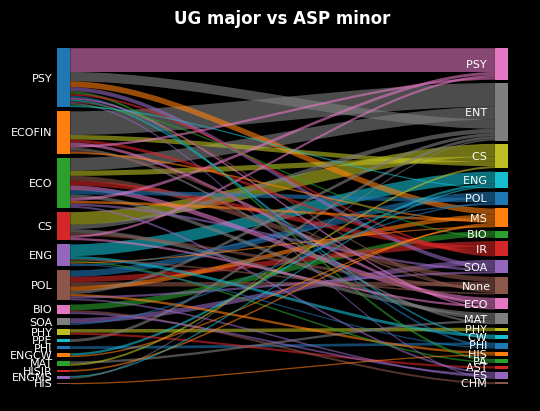

In [73]:
s = Sankey(flows=flows,
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor", weight="bold")
s.draw()

In [76]:
flows = list((all_people[["major_ug", "subject_asp"]].value_counts()).reset_index().apply(lambda x: (x["major_ug"], x["subject_asp"], x["count"]), axis=1))[:70]

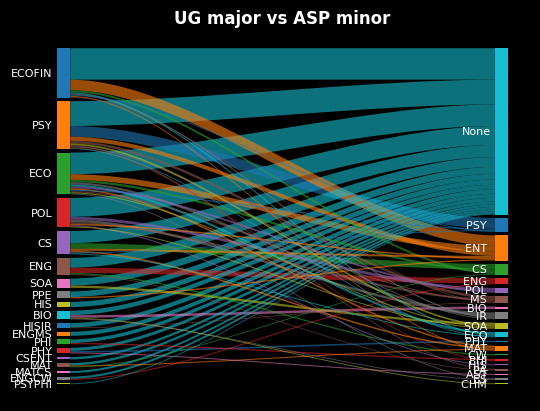

In [77]:
s = Sankey(flows=flows,
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor", weight="bold")
s.draw()

In [178]:
flows = list((all_people[["major_ug", "major_asp"]].value_counts()).reset_index().apply(
    lambda x: (x["major_ug"], x["major_asp"], x["count"]), axis=1))[:45]

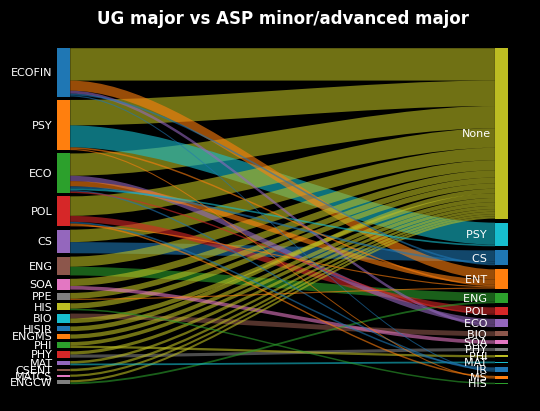

In [180]:
s = Sankey(flows=flows,
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor/advanced major", weight="bold")
s.draw()

In [80]:
asp_counts = all_people[["batch_ug", "status_asp", "grad_ug", "major_ug"]].fillna("None").value_counts().reset_index(drop=False).sort_values(by=["batch_ug"])
asp_counts = asp_counts[(asp_counts["status_asp"] != "Not Graduated") & (asp_counts["grad_ug"] < 2025)]
asp_share = (asp_counts.groupby(["batch_ug", "status_asp", "grad_ug", "major_ug"])["count"].sum() / asp_counts.groupby(["batch_ug", "grad_ug", "major_ug"])["count"].sum() * 100).reset_index()
asp_share = asp_share[asp_share["status_asp"] != "None"].groupby(["batch_ug", "grad_ug", "major_ug"])["count"].sum().reset_index().sort_values(by=["major_ug", "batch_ug"])
asp_share

,batch_ug,grad_ug,major_ug,count
41,UG 2017-20,2020.0,BIO,80.000000
59,UG 2018-21,2021.0,BIO,58.823529
77,UG 2019-22,2022.0,BIO,84.000000
97,UG 2020-23,2023.0,BIO,75.000000
117,UG 2021-24,2024.0,BIO,73.076923
...,...,...,...,...
58,UG 2017-20,2020.0,SOA,75.000000
76,UG 2018-21,2021.0,SOA,36.842105
96,UG 2019-22,2022.0,SOA,37.142857
116,UG 2020-23,2023.0,SOA,68.965517


In [81]:
means = asp_share.groupby("major_ug")["count"].mean().sort_values(ascending=False)
means

major_ug
PHICS     100.000000
POLSOC    100.000000
PHY        75.296703
MAT        75.243056
ECOHIS     75.000000
BIO        74.180090
CSENT      72.857143
CS         70.400518
CHM        70.000000
ENGPA      66.666667
ENGCW      64.227106
ENG        62.792126
PSY        62.258068
ECO        59.998121
PPE        54.130064
POL        54.032023
HIS        53.148570
ENGMS      53.121843
SOA        52.976442
ECOFIN     52.891263
HISIR      52.214556
PHI        52.154453
MATCS      48.333333
PSYPHI     20.000000
Name: count, dtype: float64

In [82]:
means = asp_share[asp_share["grad_ug"] > 2020].groupby("major_ug")["count"].mean().sort_values(ascending=False)
means

major_ug
PHICS     100.000000
ECOHIS     75.000000
PHY        74.890110
BIO        72.725113
ENGCW      71.950549
CHM        70.000000
HISIR      67.023810
PSY        66.709070
ENGPA      66.666667
MAT        66.388889
CSENT      65.000000
CS         64.820643
ECO        62.423524
ENG        61.970250
ECOFIN     59.574379
POL        58.973137
HIS        56.654283
PPE        56.520202
SOA        52.083774
ENGMS      51.527778
PHI        51.428571
MATCS      47.916667
PSYPHI     20.000000
Name: count, dtype: float64

In [83]:
means2 = asp_share[(asp_share["grad_ug"] <= 2020) & (asp_share["grad_ug"] > 2017)].groupby("major_ug")["count"].mean().sort_values(ascending=False)
means2

major_ug
POLSOC    100.000000
MAT        82.500000
BIO        80.000000
PHY        76.923077
CSENT      75.000000
CS         72.418301
ENG        58.628193
PSY        55.647517
ECO        53.306834
ENGMS      52.954545
MATCS      50.000000
PHI        49.431818
POL        44.242424
HIS        43.968254
SOA        43.750000
ECOFIN     36.610863
PPE        35.653236
ENGCW      33.333333
HISIR      33.207071
Name: count, dtype: float64

In [204]:
means3 = asp_share[(asp_share["grad_ug"] <= 2028) & (asp_share["grad_ug"] > 2022)].groupby("major_ug")["count"].mean().sort_values(ascending=False)
means3

major_ug
PSY       70.143207
ECO       68.702517
SOA       67.175066
POL       66.767788
CS        64.537119
ENG       61.411765
ECOFIN    59.979032
Name: count, dtype: float64

In [84]:
(means - means2).dropna().sort_values()

major_ug
MAT      -16.111111
CSENT    -10.000000
CS        -7.597658
BIO       -7.274887
MATCS     -2.083333
PHY       -2.032967
ENGMS     -1.426768
PHI        1.996753
ENG        3.342057
SOA        8.333774
ECO        9.116690
PSY       11.061553
HIS       12.686029
POL       14.730712
PPE       20.866966
ECOFIN    22.963516
HISIR     33.816739
ENGCW     38.617216
Name: count, dtype: float64

In [174]:
asp_share = asp_share[asp_share["major_ug"].isin(["ENG", "CS", "ECO", "ECOFIN", "PSY", "POL", "SOA"])]
asp_share["count2"] = asp_share["count"].apply(lambda x: ((float(x)-30)/2)**2)

ax = asp_share.plot(kind="scatter", x="grad_ug", y="major_ug", c="count", s="count2")
plt.title('Fourth-Year Recidivism Rate by Major', weight="bold", fontsize=12, pad=30)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(10, 6)

plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('Major', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.gcf().get_axes()[1].set_ylabel("% who stayed for ASP")

# plt.show()
plt.savefig(f"./major_minor/recidivism.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1000x600 with 0 Axes>

In [86]:
plt.figure(figsize=(9, 6))
ax = df[df["program"] == "UG"].groupby(["batch"])["batch"].count().plot(kind='line', linewidth=3, fontsize=10, color="firebrick", logy=False)
plt.title('Batch Size Over the Years', weight="bold", fontsize=12)

import matplotlib.ticker as ticker
# ax.plot(np.array(ax.get_xlim()), np.array(ax.get_ylim()), '--', color='lightcoral', linewidth=1)
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%d'))

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Batch', fontsize=10)
plt.ylabel('Batch Size', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/batchsize.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 900x600 with 0 Axes>

In [87]:
counts = df[(df["program"] == "UG")].groupby(["batch"]).count()
cagr = counts.iloc[:, 0:2].pct_change().add(1).prod().pow(1./(len(counts.columns) - 1)).sub(1) * 100
cagr

email    21.297609
id       21.297609
dtype: float64

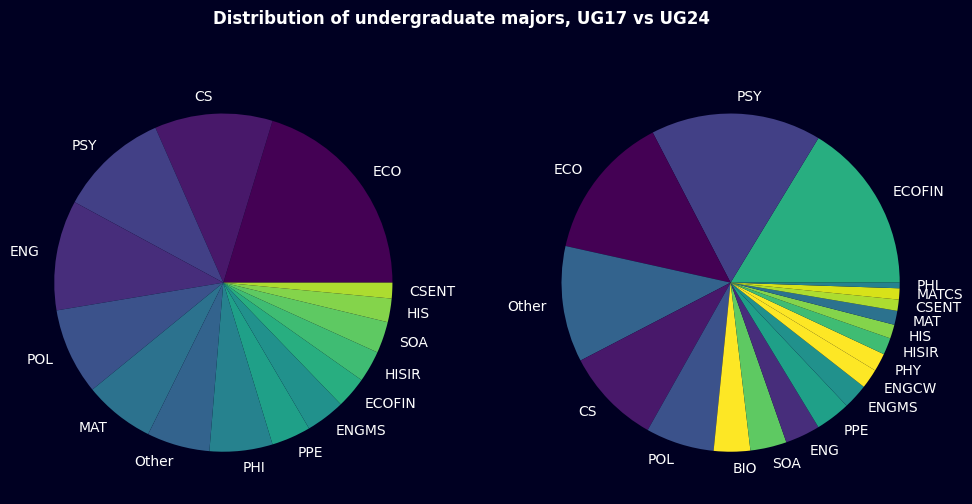

In [88]:
ug17 = df[(df["batch"] == "UG 2014-17") | (df["batch"] == "UG 2014-17")]
ug24 = df[(df["batch"] == "UG 2021-24") | (df["batch"] == "UG 2021-24")]
majors = ['PSY', 'ECOFIN', 'ECO', 'CS', 'POL', 'BIO', 'SOA', 'ENG', 'PPE', 'ENGMS', 'ENGCW', 'PHY', 'MAT', 'HISIR', 'PHI', 'HIS', 'CSENT', 'MATCS']

ug17["major"] = ug17["major"].apply(lambda x: x if x in majors else "Other")
ug24["major"] = ug24["major"].apply(lambda x: x if x in majors else "Other")
ug17values = ug17["major"].value_counts()
ug24values = ug24["major"].value_counts()

majorcolors = {label: color  for label, color in zip(['ECO', 'CS', 'ENG', 'PSY', 'POL', 'Other', 'MAT', 'PHI', 'ENGMS', 'PPE', 'ECOFIN', 'HISIR', 'SOA', 'HIS','CSENT',  'MATCS', 'BIO', 'ENGCW', 'PHY'], (plt.get_cmap('viridis')(i / 16) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate majors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[majorcolors[v] for v in ug17["major"].value_counts().keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[majorcolors[v] for v in ug24["major"].value_counts().keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

plt.show()
# plt.savefig(f"./major_minor/majorpie.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

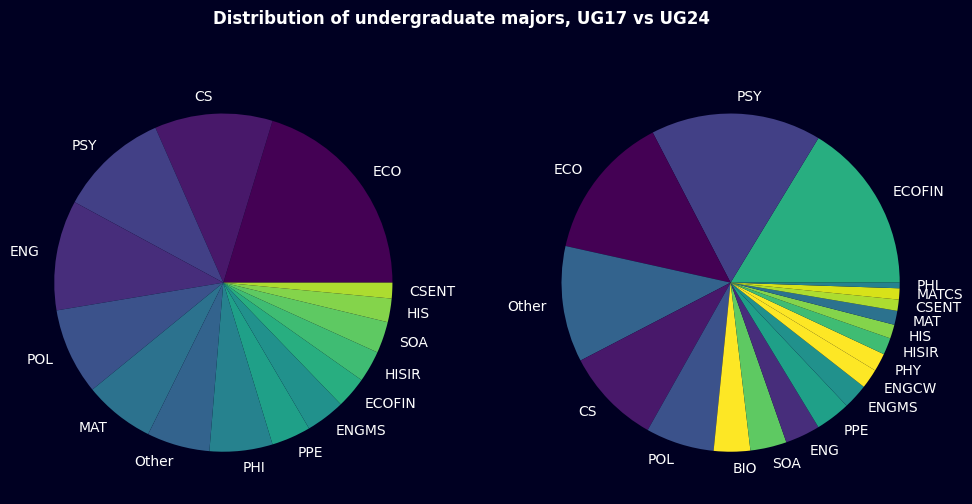

In [89]:
asp18 = df[(df["batch"] == "ASP 2017-18")]
asp24 = df[(df["batch"] == "UG 2023-24")]
majors = ['PSY', 'ECOFIN', 'ECO', 'CS', 'POL', 'BIO', 'SOA', 'ENG', 'PPE', 'ENGMS', 'ENGCW', 'PHY', 'MAT', 'HISIR', 'PHI', 'HIS', 'CSENT', 'MATCS']

ug17["major"] = ug17["major"].apply(lambda x: x if x in majors else "Other")
ug24["major"] = ug24["major"].apply(lambda x: x if x in majors else "Other")
ug17values = ug17["major"].value_counts()
ug24values = ug24["major"].value_counts()

majorcolors = {label: color  for label, color in zip(['ECO', 'CS', 'ENG', 'PSY', 'POL', 'Other', 'MAT', 'PHI', 'ENGMS', 'PPE', 'ECOFIN', 'HISIR', 'SOA', 'HIS','CSENT',  'MATCS', 'BIO', 'ENGCW', 'PHY'], (plt.get_cmap('viridis')(i / 16) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate majors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[majorcolors[v] for v in ug17["major"].value_counts().keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[majorcolors[v] for v in ug24["major"].value_counts().keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

plt.show()
# plt.savefig(f"./major_minor/majorpie.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

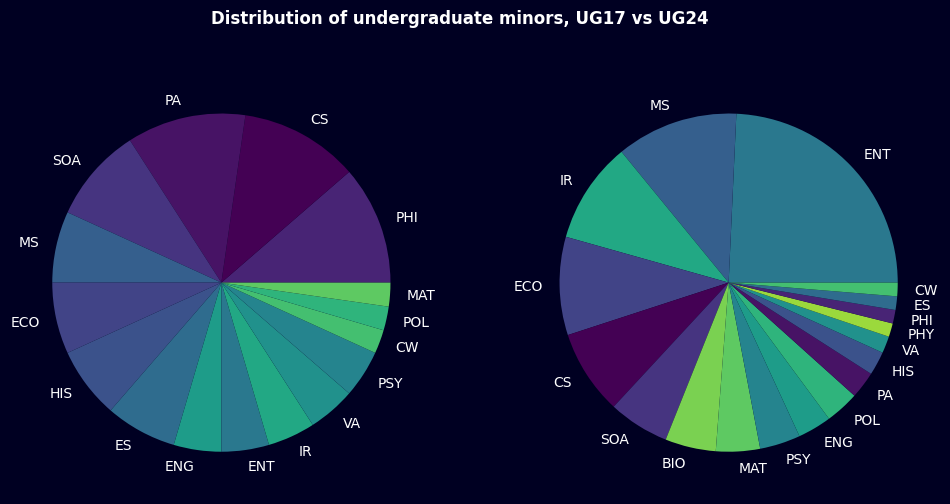

In [90]:
minors = ['PSY', 'ECO', 'FIN', 'CS', 'POL', 'BIO', 'SOA', 'ENG', 'MS', 'CW', 'PHY', 'MAT', 'IR', 'PHI', 'HIS', 'ENT', 'VA', 'PA', 'ES']

ug17["minor"] = ug17["minor"].apply(lambda x: x if x in minors else "None")
ug24["minor"] = ug24["minor"].apply(lambda x: x if x in minors else "None")
ug17values = ug17[ug17["minor"] != "None"]["minor"].value_counts()
ug24values = ug24[ug24["minor"] != "None"]["minor"].value_counts()

minorcolors = {label: color  for label, color in zip(['CS', 'PA', 'PHI', 'SOA', 'ECO', 'HIS', 'MS', 'ES', 'ENT', 'PSY', 'VA', 'ENG', 'IR', 'POL', 'CW', 'MAT', 'BIO', 'PHY', 'None'], (plt.get_cmap('viridis')(i / 20) for i in range(20)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of undergraduate minors, UG17 vs UG24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[minorcolors[v] for v in ug17values.keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[minorcolors[v] for v in ug24values.keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

In [91]:
ug25 = df[df["batch"] == "UG 2022-26"]
print(f'Share of ECO/ECOFIN/PSY majors in 2017: {len(ug17[ug17["major"].isin(["ECOFIN", "ECO", "PSY"])])/len(ug17)*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2024: {len(ug25[ug25["major"].isin(["ECOFIN", "ECO", "PSY"])])/len(ug25[ug25["major"].notna()])*100}')

Share of ECO/ECOFIN/PSY majors in 2017: 33.83458646616541
Share of ECO/ECOFIN/PSY majors in 2024: 53.50089766606823


In [92]:
print(f'Share of ECO/ECOFIN/PSY majors in 2017: {len(df[(df["batch"] == "UG 2014-17") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2014-17"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2018: {len(df[(df["batch"] == "UG 2015-18") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2015-18"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2019: {len(df[(df["batch"] == "UG 2016-19") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2016-19"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2020: {len(df[(df["batch"] == "UG 2017-20") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2017-20"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2021: {len(df[(df["batch"] == "UG 2018-21") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2018-21"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2022: {len(df[(df["batch"] == "UG 2019-22") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2019-22"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2023: {len(df[(df["batch"] == "UG 2020-23") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2020-23"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2024: {len(df[(df["batch"] == "UG 2021-24") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[df["batch"] == "UG 2021-24"])*100}')
print(f'Share of ECO/ECOFIN/PSY majors in 2025: {len(df[(df["batch"] == "UG 2022-26") & (df["major"].isin(["ECOFIN", "ECO", "PSY"]))])/len(df[(df["batch"] == "UG 2022-26") & (df["major"].notna())])*100}')

Share of ECO/ECOFIN/PSY majors in 2017: 33.83458646616541
Share of ECO/ECOFIN/PSY majors in 2018: 45.72649572649573
Share of ECO/ECOFIN/PSY majors in 2019: 42.151162790697676
Share of ECO/ECOFIN/PSY majors in 2020: 39.53488372093023
Share of ECO/ECOFIN/PSY majors in 2021: 42.608695652173914
Share of ECO/ECOFIN/PSY majors in 2022: 44.09317803660566
Share of ECO/ECOFIN/PSY majors in 2023: 44.173913043478265
Share of ECO/ECOFIN/PSY majors in 2024: 46.524064171122994
Share of ECO/ECOFIN/PSY majors in 2025: 53.50089766606823


In [93]:
print(f'Share of ECOFIN majors in 2017: {len(df[(df["batch"] == "UG 2014-17") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2014-17"])*100}')
print(f'Share of ECOFIN majors in 2018: {len(df[(df["batch"] == "UG 2015-18") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2015-18"])*100}')
print(f'Share of ECOFIN majors in 2019: {len(df[(df["batch"] == "UG 2016-19") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2016-19"])*100}')
print(f'Share of ECOFIN majors in 2020: {len(df[(df["batch"] == "UG 2017-20") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2017-20"])*100}')
print(f'Share of ECOFIN majors in 2021: {len(df[(df["batch"] == "UG 2018-21") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2018-21"])*100}')
print(f'Share of ECOFIN majors in 2022: {len(df[(df["batch"] == "UG 2019-22") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2019-22"])*100}')
print(f'Share of ECOFIN majors in 2023: {len(df[(df["batch"] == "UG 2020-23") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2020-23"])*100}')
print(f'Share of ECOFIN majors in 2024: {len(df[(df["batch"] == "UG 2021-24") & (df["major"].isin(["ECOFIN"]))])/len(df[df["batch"] == "UG 2021-24"])*100}')
print(f'Share of ECOFIN majors in 2025: {len(df[(df["batch"] == "UG 2022-26") & (df["major"].isin(["ECOFIN"]))])/len(df[(df["batch"] == "UG 2022-26") & (df["major"].notna())])*100}')

Share of ECOFIN majors in 2017: 3.007518796992481
Share of ECOFIN majors in 2018: 13.247863247863249
Share of ECOFIN majors in 2019: 10.465116279069768
Share of ECOFIN majors in 2020: 10.594315245478036
Share of ECOFIN majors in 2021: 12.391304347826088
Share of ECOFIN majors in 2022: 14.309484193011649
Share of ECOFIN majors in 2023: 14.956521739130435
Share of ECOFIN majors in 2024: 16.31016042780749
Share of ECOFIN majors in 2025: 29.443447037701976


In [94]:
print(f'Share of ECO majors in 2017: {len(df[(df["batch"] == "UG 2014-17") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2014-17"])*100}')
print(f'Share of ECO majors in 2018: {len(df[(df["batch"] == "UG 2015-18") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2015-18"])*100}')
print(f'Share of ECO majors in 2019: {len(df[(df["batch"] == "UG 2016-19") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2016-19"])*100}')
print(f'Share of ECO majors in 2020: {len(df[(df["batch"] == "UG 2017-20") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2017-20"])*100}')
print(f'Share of ECO majors in 2021: {len(df[(df["batch"] == "UG 2018-21") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2018-21"])*100}')
print(f'Share of ECO majors in 2022: {len(df[(df["batch"] == "UG 2019-22") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2019-22"])*100}')
print(f'Share of ECO majors in 2023: {len(df[(df["batch"] == "UG 2020-23") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2020-23"])*100}')
print(f'Share of ECO majors in 2024: {len(df[(df["batch"] == "UG 2021-24") & (df["major"].isin(["ECO"]))])/len(df[df["batch"] == "UG 2021-24"])*100}')
print(f'Share of ECO majors in 2025: {len(df[(df["batch"] == "UG 2022-26") & (df["major"].isin(["ECO"]))])/len(df[(df["batch"] == "UG 2022-26") & (df["major"].notna())])*100}')

Share of ECO majors in 2017: 20.30075187969925
Share of ECO majors in 2018: 18.37606837606838
Share of ECO majors in 2019: 15.406976744186046
Share of ECO majors in 2020: 13.178294573643413
Share of ECO majors in 2021: 15.0
Share of ECO majors in 2022: 12.146422628951747
Share of ECO majors in 2023: 14.08695652173913
Share of ECO majors in 2024: 13.903743315508022
Share of ECO majors in 2025: 7.1813285457809695


In [95]:
print(f'Share of PSY majors in 2017: {len(df[(df["batch"] == "UG 2014-17") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2014-17"])*100}')
print(f'Share of PSY majors in 2018: {len(df[(df["batch"] == "UG 2015-18") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2015-18"])*100}')
print(f'Share of PSY majors in 2019: {len(df[(df["batch"] == "UG 2016-19") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2016-19"])*100}')
print(f'Share of PSY majors in 2020: {len(df[(df["batch"] == "UG 2017-20") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2017-20"])*100}')
print(f'Share of PSY majors in 2021: {len(df[(df["batch"] == "UG 2018-21") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2018-21"])*100}')
print(f'Share of PSY majors in 2022: {len(df[(df["batch"] == "UG 2019-22") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2019-22"])*100}')
print(f'Share of PSY majors in 2023: {len(df[(df["batch"] == "UG 2020-23") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2020-23"])*100}')
print(f'Share of PSY majors in 2024: {len(df[(df["batch"] == "UG 2021-24") & (df["major"].isin(["PSY"]))])/len(df[df["batch"] == "UG 2021-24"])*100}')
print(f'Share of PSY majors in 2025: {len(df[(df["batch"] == "UG 2022-26") & (df["major"].isin(["PSY"]))])/len(df[(df["batch"] == "UG 2022-26") & (df["major"].notna())])*100}')

Share of PSY majors in 2017: 10.526315789473683
Share of PSY majors in 2018: 14.102564102564102
Share of PSY majors in 2019: 16.27906976744186
Share of PSY majors in 2020: 15.762273901808785
Share of PSY majors in 2021: 15.217391304347828
Share of PSY majors in 2022: 17.637271214642265
Share of PSY majors in 2023: 15.130434782608695
Share of PSY majors in 2024: 16.31016042780749
Share of PSY majors in 2025: 16.87612208258528


In [96]:
print(f'Number of Economics majors in 2017: {len(ug17[ug17["major"].isin(["ECOFIN", "ECO"])])}')
print(f'Number of Economics majors in 2024: {len(ug24[ug24["major"].isin(["ECOFIN", "ECO"])])}')

Number of Economics majors in 2017: 31
Number of Economics majors in 2024: 226


In [97]:
print(f'Number of Psych majors in 2017: {len(ug17[ug17["major"].isin(["PSY"])])}')
print(f'Number of Psych majors in 2024: {len(ug24[ug24["major"].isin(["PSY"])])}')

Number of Psych majors in 2017: 14
Number of Psych majors in 2024: 122


In [98]:
print(f'Share of English majors in 2017: {len(ug17[ug17["major"].isin(["ENG", "ENGMS", "ENGCW"])])/len(ug17)*100}')
print(f'Share of English majors in 2024: {len(ug24[ug24["major"].isin(["ENG", "ENGMS", "ENGCW"])])/len(ug24)*100}')

Share of English majors in 2017: 14.285714285714285
Share of English majors in 2024: 7.620320855614973


In [99]:
print(f'Number of English majors in 2017: {len(ug17[ug17["major"].isin(["ENG", "ENGMS", "ENGCW"])])}')
print(f'Number of English majors in 2024: {len(ug24[ug24["major"].isin(["ENG", "ENGMS", "ENGCW"])])}')

Number of English majors in 2017: 19
Number of English majors in 2024: 57


In [100]:
asp17 = df[df["batch"] == "ASP 2017-18"]
asp25 = df[df["batch"] == "ASP 2024-25"]
print(f'Share of ENT minors in 2017: {len(ug17[ug17["minor"].isin(["ENT"])])/len(ug17)*100}')
print(f'Share of ENT minors in 2024: {len(ug24[ug24["minor"].isin(["ENT"])])/len(ug24)*100}')

Share of ENT minors in 2017: 1.5037593984962405
Share of ENT minors in 2024: 10.026737967914439


In [101]:
print(f'Number of ENT minors in 2017: {len(ug17[ug17["minor"].isin(["ENT"])])}')
print(f'Number of ENT minors in 2024: {len(ug24[ug24["minor"].isin(["ENT"])])}')

Number of ENT minors in 2017: 2
Number of ENT minors in 2024: 75


In [102]:
print(f'Humanities majors on campus in 2016-17: {df[(df["grad"] < 2020) & (df["major"].isin(["ENG", "POL", "PHI", "ENGMS", "PPE", "HISIR", "SOA", "HIS"]) | (df["minor"].isin(["ENG", "POL", "PHI", "MS", "SOA", "HIS", "IR", "ES"])))]["batch"].count() / df[df["grad"] < 2020]["batch"].count() * 100}')
print(f'Humanities majors on campus in 2022-23: {df[(df["grad"] < 2026) & (df["grad"] > 2022) & (df["major"].isin(["ENG", "POL", "PHI", "ENGMS", "PPE", "HISIR", "SOA", "HIS"]) | (df["minor"].isin(["ENG", "POL", "PHI", "MS", "SOA", "HIS", "IR", "ES"])))]["batch"].count() / df[(df["grad"] < 2026) & (df["grad"] > 2022)]["batch"].count() * 100}')

Humanities majors on campus in 2016-17: 50.649350649350644
Humanities majors on campus in 2022-23: 30.424434748115825


In [103]:
print(f'STEM majors on campus in 2019: {df[(df["grad"] < 2020) & (df["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"]) | (df["minor"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"])))]["batch"].count() / df[df["grad"] < 2020]["batch"].count() * 100}')
print(f'STEM majors on campus in 2022: {df[(df["grad"] < 2026) & (df["grad"] > 2022) & (df["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"]) | (df["minor"].isin(["CS", "MAT", "BIO", "PHY", "CHM", "CSMAT", "CSENT"])))]["batch"].count() / df[(df["grad"] < 2026) & (df["grad"] > 2022)]["batch"].count() * 100}')

STEM majors on campus in 2019: 16.666666666666664
STEM majors on campus in 2022: 21.26140420468068


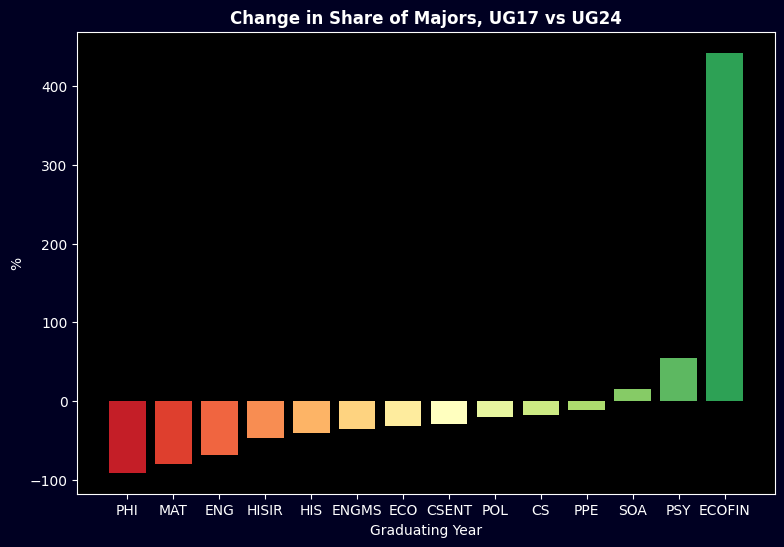

In [104]:
df["major"] = df["major"].apply(lambda x: "CS" if x in ["CS", "MATCS", "CSENT"] else "ENG" if x in ["ENG", "ENGCW", "ENGMS"] else "HIS" if x in ["HIS", "HISIR"] else x)

ug17values = ug17["major"].value_counts()
ug24values = ug24["major"].value_counts()
ug24share = (ug24values/ug24values.sum())*100
ug17share = (ug17values/ug17values.sum())*100
share_change = (((ug24share - ug17share)/ug17share)*100).dropna().sort_values(ascending=True).reset_index()
share_change = share_change[share_change["major"] != "Other"]

colors = [mpl.colors.rgb2hex(plt.get_cmap("RdYlGn", 17)(i)) for i in range(plt.get_cmap("RdYlGn_r", 15).N)][1:]
profit_color = [(colors[0] if p > 0 else colors[-1]) for p in share_change["count"]]

fig = plt.figure(figsize=(9, 6), facecolor="#000022")
plt.bar(x=share_change["major"], height=share_change["count"], color = colors)
plt.title('Change in Share of Majors, UG17 vs UG24', weight="bold", fontsize=12)

plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

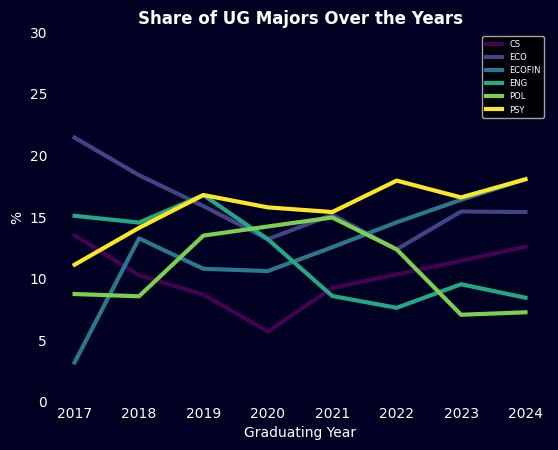

In [105]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[category_counts["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:6]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of UG Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 30)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

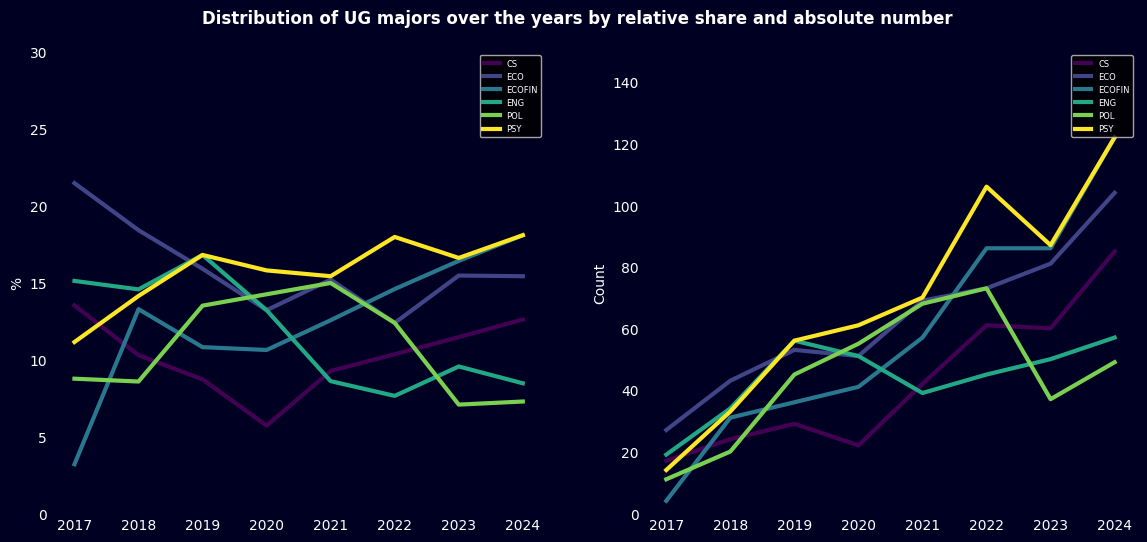

In [106]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[category_counts["major"].isin(list(df["major"].value_counts().reset_index()["major"].iloc[:6]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df_count = category_counts.pivot(index='grad', columns='major', values='count').fillna(0)
pivot_df_share = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Distribution of UG majors over the years by relative share and absolute number", weight="bold", x=0.5, y=0.95, fontsize=12)

pivot_df_share.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])

axes[0].set_ylim(0, 30)
axes[0].set_ylabel("%", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

In [107]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of STEM Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(9, 6)

ax.set_ylim(0, 18)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/stem.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 900x600 with 0 Axes>

In [108]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of Humanities Majors Over the Years', weight="bold", fontsize=12, pad=40)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(10, 6)

ax.set_ylim(0, 18)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/humanities.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1000x600 with 0 Axes>

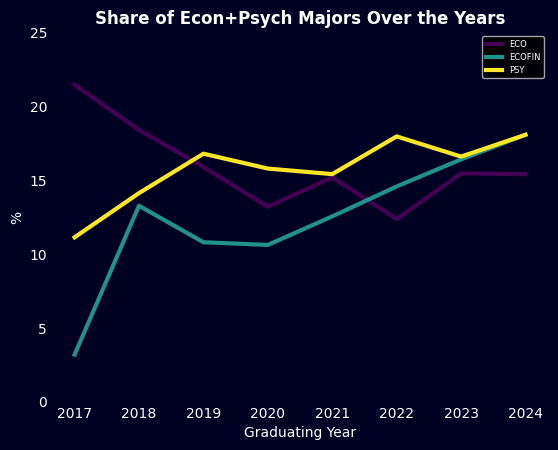

In [109]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()
category_counts = category_counts[(category_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df = category_counts.pivot(index='grad', columns='major', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Share of Econ+Psych Majors Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 25)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

In [110]:
category_counts = df[(df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby('grad')['count'].sum().reset_index()

category_counts = category_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100

core_counts = category_counts[(category_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = category_counts[(category_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = category_counts[(category_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of UG majors over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/comparison.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1400x600 with 0 Axes>

In [111]:
def fuzzy_merge(df_1, df_name, key1, key2, threshold=90, limit=3):

    column = df_name[key2].tolist()

    matches = df_1[key1].apply(lambda x: process.extract(x, column, limit=limit))
    df_1['matches'] = matches

    m2 = df_1['matches'].apply(lambda x: ', '.join([str(i[0]) for i in x if i[1] >= threshold]).split(",")[0])
    m2 = m2.apply(lambda x: x if x != "nan" else "")
    df_1['matches'] = m2

    def get_probability(x):
        if x in df_name[key2].values:
            return df_name.loc[df_name[key2] == x, "Male Probability"].values[0]
        return None

    df_1['probability'] = df_1['matches'].apply(get_probability)

    return df_1

In [112]:
# name_gender = pd.read_csv("./gender/indian_first_names.csv").drop(["Index", "Count"], axis=1)
# name_gender["Name"] = name_gender["Name"].apply(lambda x: x.capitalize())
# df["first_name"] = df["name"].apply(lambda x: x.split(" ")[0])
# gender_df = fuzzy_merge(df, name_gender, 'first_name', 'Name', threshold=60)
# gender_df["gender"] = gender_df["probability"].apply(lambda x: "male" if x > 0.8 else "female")
# gender_df.to_csv("./gender_students.csv")
gender_df = pd.read_csv("./gender/gender_df.csv", index_col=0)
gender_df

,batch,email,id,name,status,major,minor,program,grad,cgpa,mgpa,gender,first_name,matches,probability
321,UG 2014-17,shivangi.tikekar@ashoka.edu.in,UG-14-0166,Shivangi Tikekar,Graduated,CS,NaN,UG,2017,3.28,3.28,female,Shivangi,Shivangi,0.0
415,UG 2014-17,samridh.kudesia@ashoka.edu.in,UG-14-1375,Samridh Kudesia,Graduated,CS,POL,UG,2017,3.16,3.08,female,Samridh,Samridhi,0.0
727,UG 2014-17,mihika.sood@ashoka.edu.in,UG-14-1617,Mihika Sood,Graduated,CS,ENT,UG,2017,2.74,2.43,female,Mihika,Ishika,0.0
907,UG 2014-17,krathika.parchani@ashoka.edu.in,UG-14-0063,Krathika Parchani,Graduated,ECO,NaN,UG,2017,3.63,3.64,female,Krathika,Kratika,0.0
969,UG 2014-17,smera.dania@ashoka.edu.in,UG-14-3381,Smera Dania,Graduated,ECO,NaN,UG,2017,3.10,3.04,female,Smera,Era,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,UG 2023-27,vivaan.majumder_ug2023@ashoka.edu.in,1020231735,Vivaan Majumder,Enrolled,NaN,NaN,UG,2027,3.44,0.00,male,Vivaan,Vivian,1.0
6674,UG 2023-27,yashwanth.bommareddy_ug2023@ashoka.edu.in,1020231745,Yashwanth Vema Reddy Bommareddy,Enrolled,NaN,NaN,UG,2027,3.50,0.00,male,Yashwanth,Yashwanth,1.0
6677,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027,3.19,0.00,male,Yuvraj,Yuvraj,1.0
6678,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027,0.00,0.00,male,Zahra,Abhra,1.0


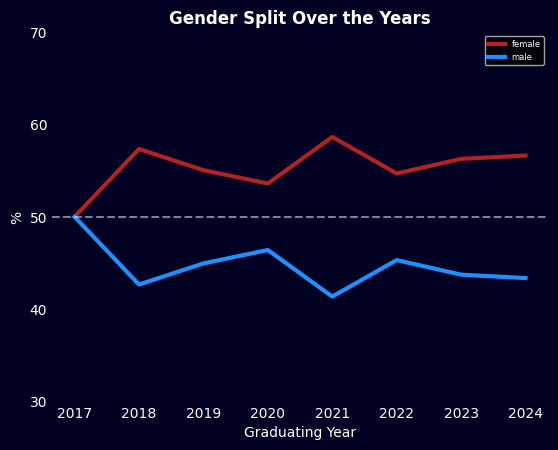

In [113]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby('grad')['count'].sum().reset_index()
gender_counts = gender_counts[gender_counts["gender"].isin(["male", "female"])]

gender_counts = gender_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
pivot_df = gender_counts.pivot(index='grad', columns='gender', values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, color=["firebrick", "dodgerblue"])
plt.title('Gender Split Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(30, 70)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

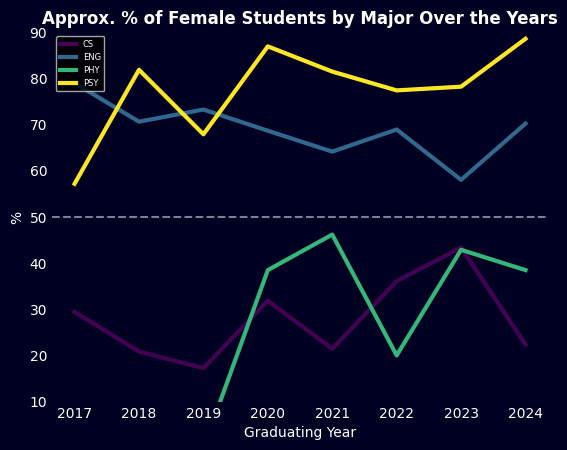

In [114]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby(['grad', 'major'])['count'].sum().reset_index()
gender_counts = gender_counts[(gender_counts["gender"].isin(["male", "female"])) & (gender_counts["major"].isin(["PHY", "PSY", "CS", "ENG"]))]

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

pivot_df = gender_counts.pivot(index='grad', columns=['major'], values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Approx. % of Female Students by Major Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(10, 90)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

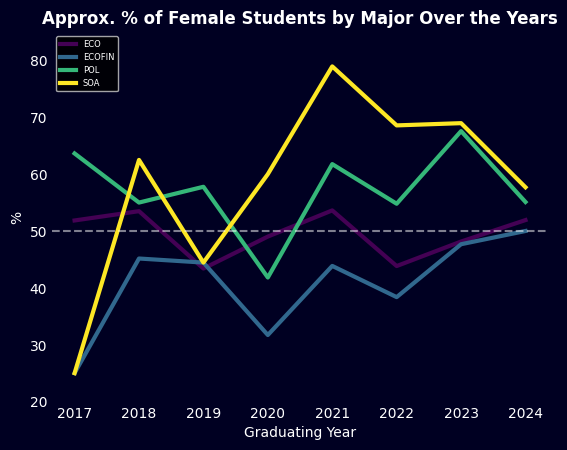

In [115]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = category_counts.groupby(['grad', 'major'])['count'].sum().reset_index()
gender_counts = gender_counts[(gender_counts["gender"].isin(["male", "female"])) & (gender_counts["major"].isin(["POL", "ECO", "ECOFIN", "SOA"]))]

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

pivot_df = gender_counts.pivot(index='grad', columns=['major'], values='percentage').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Approx. % of Female Students by Major Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(20, 85)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

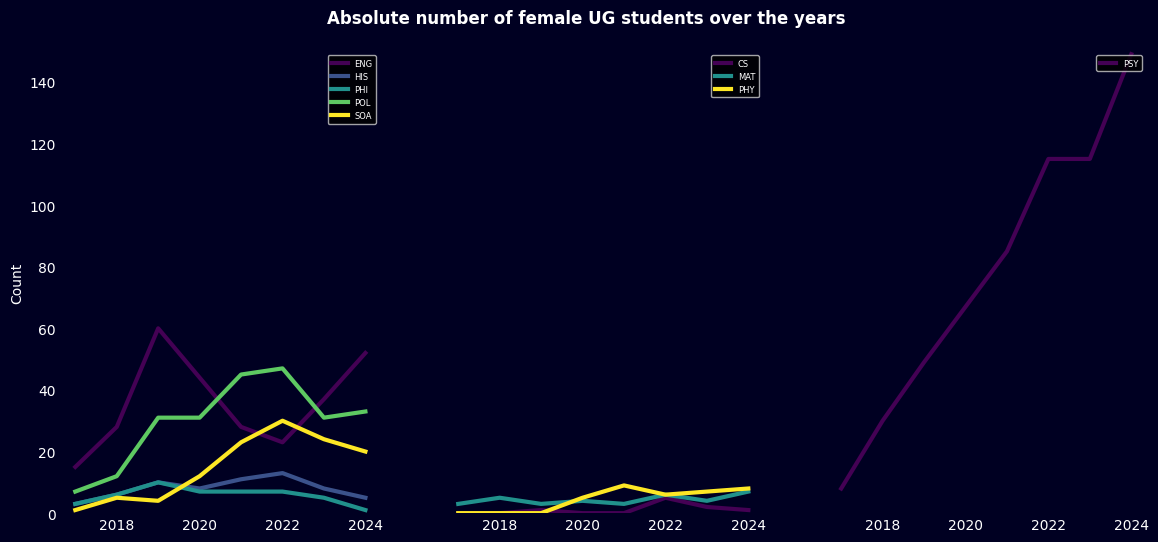

In [116]:
gender_counts = gender_df[(gender_df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby(['grad', 'major'])['count'].sum().reset_index()

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "female"]

core_counts = gender_counts[(gender_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = gender_counts[(gender_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = gender_counts[(gender_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of female UG students over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

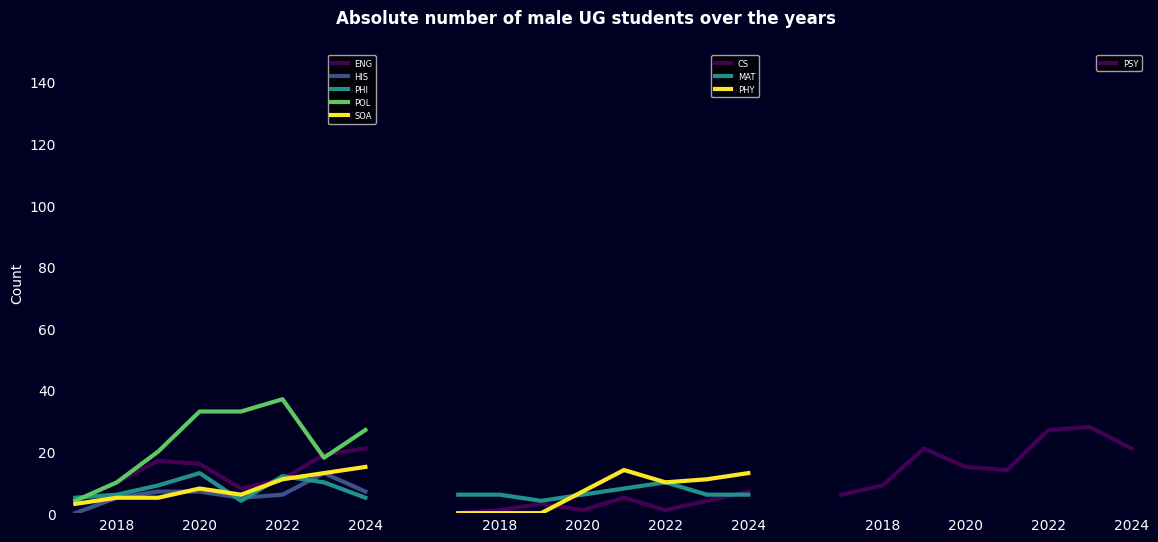

In [117]:
gender_counts = gender_df[(gender_df["grad"] <= 2024) & (df["program"] == "UG")].groupby(['grad', 'gender', 'major']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby(['grad', 'major'])['count'].sum().reset_index()

gender_counts = gender_counts.merge(yearly_totals, on=['grad', 'major'], suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
gender_counts = gender_counts[gender_counts["gender"] == "male"]

core_counts = gender_counts[(gender_counts["major"].isin(["ECO", "ECOFIN", "PSY"]))]
hum_counts = gender_counts[(gender_counts["major"].isin(["SOA", "PHI", "HIS", "POL", "ENG"]))]
stem_counts = gender_counts[(gender_counts["major"].isin(["CS", "MAT", "BIO", "PHY", "CHM"]))]

core_pivot_df_count = core_counts.pivot(index='grad', columns='major', values='count').fillna(0)
hum_pivot_df_count = hum_counts.pivot(index='grad', columns='major', values='count').fillna(0)
stem_pivot_df_count = stem_counts.pivot(index='grad', columns='major', values='count').fillna(0)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Absolute number of male UG students over the years", weight="bold", x=0.5, y=0.95, fontsize=12)

hum_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
stem_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1])
core_pivot_df_count.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[2])

axes[0].set_ylim(0, 150)
axes[0].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_ylim(0, 150)
axes[1].set_ylabel("Count", fontsize=10)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.legend(fontsize=6, loc="upper right")
    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

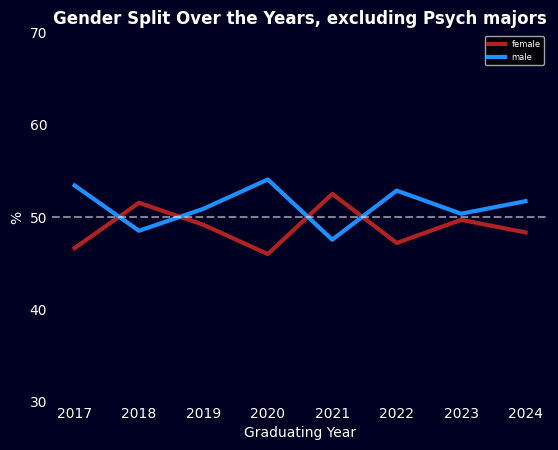

In [118]:
gender_counts = gender_df[(gender_df["grad"] <= 2025) & (gender_df["program"] == "UG") & ~((gender_df["major"] == "PSY") & (gender_df["gender"] == "female"))].groupby(['grad', 'gender']).size().reset_index(name='count')
yearly_totals = gender_counts.groupby('grad')['count'].sum().reset_index()
gender_counts = gender_counts[gender_counts["gender"].isin(["male", "female"])]

gender_counts = gender_counts.merge(yearly_totals, on='grad', suffixes=('', '_total'))
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count_total']) * 100
pivot_df = gender_counts.pivot(index='grad', columns='gender', values='percentage')

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, color=["firebrick", "dodgerblue"])
plt.title('Gender Split Over the Years, excluding Psych majors', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_yticks([x for x in range(0, 110, 10)])
ax.set_ylim(30, 70)
plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.axhline(y = 50, color = 'white', linestyle = 'dashed', alpha=0.5)
plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

In [135]:
gender_df[gender_df["program"] == "UG"].reset_index(drop=True)["batch"].value_counts()

batch
UG 2023-27    748
UG 2021-24    671
UG 2022-26    662
UG 2019-22    576
UG 2020-23    519
UG 2018-21    440
UG 2017-20    375
UG 2016-19    327
UG 2015-18    225
UG 2014-17    126
Name: count, dtype: int64

In [140]:
gendered_people = pd.merge(gender_df[gender_df["program"] == "UG"].reset_index(drop=True), all_people, how="inner", left_on="email", right_on="email_ug")
gendered_people

,batch,email,id,name_x,status,major,minor,program,grad,cgpa,...,id_asp,status_asp,major_asp,minor_asp,program_asp,grad_asp,cgpa_asp,mgpa_asp,ug_grad,subject_asp
0,UG 2014-17,shivangi.tikekar@ashoka.edu.in,UG-14-0166,Shivangi Tikekar,Graduated,CS,NaN,UG,2017,3.28,...,UG-14-0166,Graduated,CS,MS,ASP,2018.0,3.28,0.0,2017.0,MS
1,UG 2014-17,samridh.kudesia@ashoka.edu.in,UG-14-1375,Samridh Kudesia,Graduated,CS,POL,UG,2017,3.16,...,UG-14-1375,Graduated,CS,POL,ASP,2018.0,3.16,0.0,2017.0,POL
2,UG 2014-17,mihika.sood@ashoka.edu.in,UG-14-1617,Mihika Sood,Graduated,CS,ENT,UG,2017,2.74,...,UG-14-1617,Graduated,PSY,PSY,ASP,2018.0,2.74,0.0,2017.0,PSY
3,UG 2014-17,krathika.parchani@ashoka.edu.in,UG-14-0063,Krathika Parchani,Graduated,ECO,NaN,UG,2017,3.63,...,UG-14-0063,Graduated,IR,IR,ASP,2018.0,3.61,0.0,2017.0,IR
4,UG 2014-17,smera.dania@ashoka.edu.in,UG-14-3381,Smera Dania,Graduated,ECO,NaN,UG,2017,3.10,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,UG 2023-27,vivaan.majumder_ug2023@ashoka.edu.in,1020231735,Vivaan Majumder,Enrolled,NaN,NaN,UG,2027,3.44,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None
4665,UG 2023-27,yashwanth.bommareddy_ug2023@ashoka.edu.in,1020231745,Yashwanth Vema Reddy Bommareddy,Enrolled,NaN,NaN,UG,2027,3.50,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None
4666,UG 2023-27,yuvraj.verma_ug2023@ashoka.edu.in,1020231748,Yuvraj Verma,Enrolled,NaN,NaN,UG,2027,3.19,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None
4667,UG 2023-27,zahra.baqeri_ug2023@ashoka.edu.in,1020231020,Zahra Baqeri,Enrolled,NaN,NaN,UG,2027,0.00,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None


In [151]:
gendered_people.groupby(["batch_ug", "gender", "major"])["major_ug"].count().reset_index()

,batch_ug,gender,major,major_ug
0,UG 2014-17,female,CS,5
1,UG 2014-17,female,ECO,14
2,UG 2014-17,female,ECOFIN,1
3,UG 2014-17,female,ENG,15
4,UG 2014-17,female,HIS,3
...,...,...,...,...
256,UG 2022-26,male,PPE,8
257,UG 2022-26,male,PSY,18
258,UG 2022-26,male,PSYPHI,2
259,UG 2022-26,male,SOA,1


In [119]:
df["minor"] = df["minor"].apply(lambda x: x.split(",")[0] if "," in str(x) else x)
minor_share = (df[df["program"] == "UG"].fillna("None").groupby(["batch", "grad"])["minor"].value_counts() / df[df["program"] == "UG"].groupby(["batch", "grad"])["batch"].value_counts() * 100).reset_index()
minor_share["abs"] = df[df["program"] == "UG"].fillna("None").groupby(["batch", "grad"])["minor"].value_counts().reset_index()["count"]
minor_share = minor_share[(minor_share["grad"] < 2025) & (minor_share["abs"] >= 3)]
minor_share["type"] = minor_share["minor"].apply(lambda x: "STEM" if x in ["PHY", "BIO", "CS", "MAT", "CHM"] else "Humanities" if x in ["ENG", "CW", "CHI", "ES", "SOA", "PHI", "HIS", "IR", "POL"] else "MS,PA,VA" if x in ["MS", "PA", "VA"] else "ECO,PSY" if x in ["ECO", "PSY"] else x)
minor_share

,batch,grad,minor,count,abs,type
0,UG 2014-17,2017.0,None,64.661654,86,None
1,UG 2014-17,2017.0,CS,3.759398,5,STEM
2,UG 2014-17,2017.0,PA,3.759398,5,"MS,PA,VA"
3,UG 2014-17,2017.0,PHI,3.759398,5,Humanities
4,UG 2014-17,2017.0,SOA,3.007519,4,Humanities
...,...,...,...,...,...,...
154,UG 2021-24,2024.0,PHI,0.802139,6,Humanities
155,UG 2021-24,2024.0,CHI,0.534759,4,Humanities
156,UG 2021-24,2024.0,CW,0.534759,4,Humanities
157,UG 2021-24,2024.0,ES,0.534759,4,Humanities


In [120]:
minortype_share = minor_share.groupby(["type", "grad", "batch"])["count"].sum().reset_index()
minortype_share

,type,grad,batch,count
0,"ECO,PSY",2017.0,UG 2014-17,2.255639
1,"ECO,PSY",2018.0,UG 2015-18,5.128205
2,"ECO,PSY",2019.0,UG 2016-19,6.976744
3,"ECO,PSY",2020.0,UG 2017-20,5.426357
4,"ECO,PSY",2021.0,UG 2018-21,5.217391
5,"ECO,PSY",2022.0,UG 2019-22,6.988353
6,"ECO,PSY",2023.0,UG 2020-23,5.043478
7,"ECO,PSY",2024.0,UG 2021-24,5.748663
8,ENT,2018.0,UG 2015-18,2.564103
9,ENT,2019.0,UG 2016-19,4.069767


In [121]:
plt.figure(figsize=(9, 6))

ax = minortype_share[minortype_share["type"].isin(["Humanities", "ENT", "None"])].pivot(index='grad', columns='type', values='count').plot(kind='line', linewidth=3, fontsize=10, logy=False, legend=True, cmap="viridis_r")
plt.title('Share of UG Minors/Concentrations over the years', weight="bold", fontsize=12, pad=20)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Graduating Year', fontsize=10)
plt.ylabel('%', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

ax.legend(title="", fontsize=8)
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)
plt.gcf().set_size_inches(10, 6)

# plt.show()
plt.savefig(f"./major_minor/minors.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 900x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [122]:
nz_df = df[df["minor"].notna()]
flows = list((nz_df[["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))[:50]

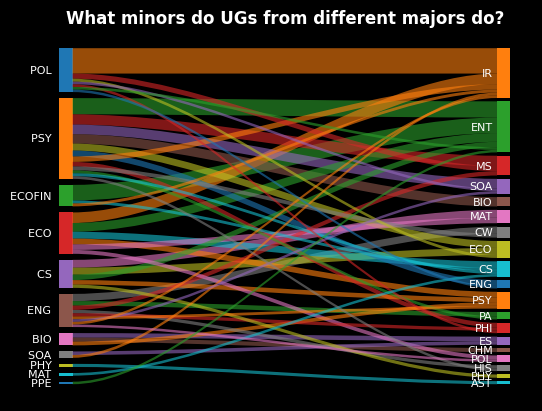

In [123]:
s = Sankey(flows=flows, flow_color_mode='destination',
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("What minors do UGs from different majors do?", weight="bold")
s.draw()

In [124]:
flows = list((nz_df[nz_df["batch"] == "UG 2014-17"][["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))

In [125]:
fig = plt.figure(figsize=(6, 6))
s = Sankey(flows=flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 16),
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
s.draw()

fig.patch.set_facecolor('#000022')

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

# plt.show()
plt.savefig(f"./major_minor/u17combinations.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 600x600 with 0 Axes>

In [126]:
flows = list((nz_df[nz_df["batch"] == "UG 2021-24"][["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))[:33]

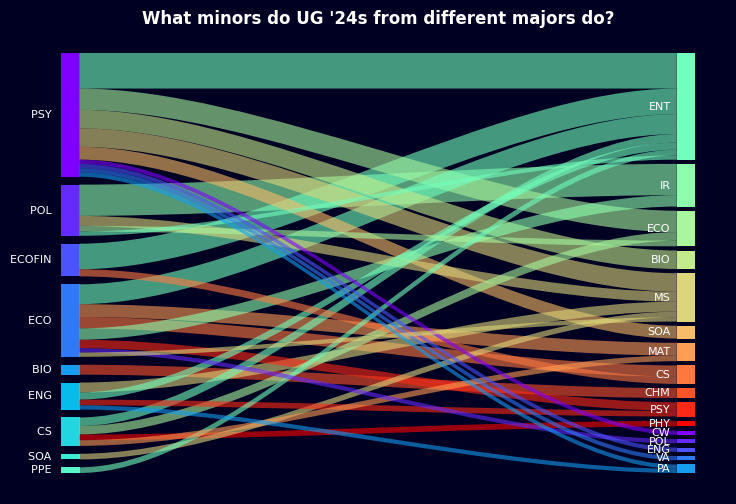

In [127]:
fig = plt.figure(figsize=(9, 6))
s = Sankey(flows=flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 20),
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("What minors do UG '24s from different majors do?", weight="bold", fontsize=12)

fig.patch.set_facecolor('#000022')

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

s.draw()

In [128]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("What major-minor combinations do students pursue?", weight="bold", x=0.5, y=0.95, fontsize=12)

ug17flows = list((nz_df[nz_df["batch"] == "UG 2014-17"][["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))
ug24flows = list((nz_df[nz_df["batch"] == "UG 2021-24"][["major", "minor"]].value_counts()).reset_index().apply(lambda x: (x["major"] + " ", x["minor"], x["count"]), axis=1))[:33]

# s1 = Sankey(flows=ug17flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 16),
#            node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
# s1.draw()

s2 = Sankey(flows=ug24flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 25),
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
s2.draw()

for ax in axes:
    ax.set_facecolor("#000022")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)
    ax.set_axis_off()

# plt.show()
plt.savefig(f"./major_minor/ug24combinations.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1400x600 with 0 Axes>

In [244]:
recent = people[people["grad_ug"] > 2021]
flows = list((recent[["major_ug", "minor_asp"]].value_counts()).reset_index().apply(
    lambda x: (x["major_ug"], x["minor_asp"], x["count"]), axis=1))[:37]

In [247]:
fig = plt.figure(figsize=(10, 6))
s = Sankey(flows=flows, flow_color_mode='destination', cmap=plt.get_cmap("rainbow", 14),
           node_opts=dict(label_pos="left", label_opts={"fontsize": 8}, label_format='{label}'))
plt.title("UG major vs ASP minor/concentration, previous three batches", weight="bold", fontsize=12, pad=15)

fig.patch.set_facecolor('#000022')

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

s.draw()
plt.savefig(f"./major_minor/aspchoices.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
plt.clf()

<Figure size 1000x600 with 0 Axes>